In [1]:
import easyocr
import pandas as pd
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

from box_cluster import sort_boxes, cluster_boxes

In [2]:
def imread(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
df = pd.read_excel('data/tg/tg.xlsx')

In [4]:
df.head(1)

,VR,image
0,108,11533d10-009b-47a6-a0e2-8c7e77f6190b.jpg


In [5]:
# pip install weasyprint

In [7]:
reader = easyocr.Reader(['ru'], gpu=True)

In [8]:
paths = glob.glob('data/*/images/*.jpg') + glob.glob('data/*/images/*.png')
paths.sort()

In [9]:
len(paths)

926

In [10]:
path = paths[4]

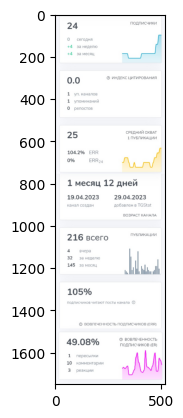

In [11]:
plt.imshow(imread(path))

In [14]:
%%time
result = reader.readtext(path)

CPU times: user 1.73 s, sys: 201 ms, total: 1.93 s
Wall time: 457 ms


In [15]:
image = imread(path)

In [16]:
boxes = [np.array(item[0]) for item in result]
len(boxes)

41

In [20]:
clusters = cluster_boxes(boxes, tight_scale=0)
len(clusters)

15

In [23]:
for cluster in clusters:
    cluster_color = tuple(np.random.randint(0, 255, 3).tolist())
    for box in cluster.get_sorted_boxes():
        pts = np.array(box, np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(image, [pts], isClosed=True, color=cluster_color, thickness=2)

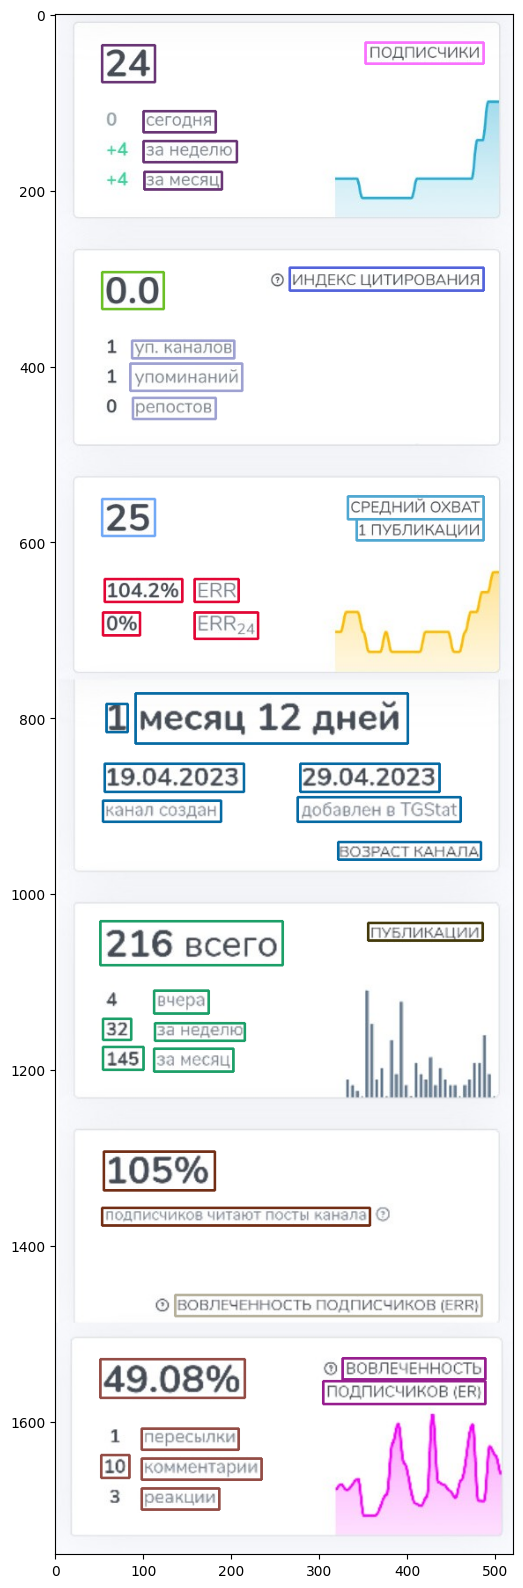

In [24]:
fig = plt.figure(figsize=(20, 20))
plt.imshow(image)